<a href="https://colab.research.google.com/github/jeffbgreene/geology-558/blob/main/Unsupervised_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
### Jeff Greene
### 1/16/2025
### Data for this project was retrieved from Asterank, "a scientific and economic database of over 600,000 asteroids."

In [1]:
# Install the requests library so that the API call to Asterank can be made
!pip install requests
!pip install ydata-profiling

In [2]:
import pandas as pd
import pandas as pd
from ydata_profiling import ProfileReport

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for API call and JSON parsing
import requests
from pandas import json_normalize

# Set the figure size
plt.rcParams["figure.figsize"] = (25,25)
# Set the default font size
plt.rcParams.update({'font.size': 15})

### Grabbing asteroid data sorted by value from the Asterank API

Below is a table of some of the column names that are in the data set and the description of what they are.

| Attributes | Description |
| ---- | ---- |
| SPK-ID | Object primary SPK-ID |
| ID | Object internal database ID |
| Fullname | Object full name/designation |
| pdes | Object primary designation |
| NEO | Near-Earth Object (NEO) flag |
| PHA | Potentially Hazardous Asteroid (PHA) flag |
| H | Absolute magnitude parameter |
| Diameter | object diameter (from equivalent sphere) km Unit |
| Albedo | Geometric albedo |
| Diameter sigma | 1-sigma uncertainty in object diameter km Unit |
| Orbit id | Orbit solution ID |
| Epoch | Epoch of osculation in modified Julian day form |
| Equinox | Equinox of reference frame |
| e | Eccentricity |
| a | Semi-major axis au Unit |
| q | perihelion distance au Unit |
| i | inclination; angle with respect to x-y ecliptic plane |
| tp | Time of perihelion passage TDB Unit |
| moid ld | Earth Minimum Orbit Intersection Distance au Unit |




In [3]:
# Using an API call to Asterank to get the first 5000 rows of data sorted by asteroid value
url = 'https://www.asterank.com/api/rankings?sort_by=value&limit=5000'
data = requests.get(url)

# Store the API response in a variable.
available_data = data.json()
df = json_normalize(available_data)
print(f'The length of the Asterank dataset for the unsupervised module is: {len(df)}')

The length of the Asterank dataset for the unsupervised module is: 5000


In [4]:
# Take a look at the first 5 records to try to determine what data cleaning
# needs to be performed
df.head()

sigma_tp diameter  epoch_mjd        ad    producer      rms    closeness  \
0  0.000050  270.327    58600.0  3.760305  Otto Matic  0.49535  2634.479570   
1  0.000720   198.77    58600.0  3.981728  Otto Matic  0.48923  2622.635949   
2  0.000576   190.98    58600.0  3.247375  Otto Matic  0.44762  2631.736774   
3  0.000289  175.859    58600.0  3.176470  Otto Matic  0.44609  2634.754684   
4  0.000053  173.642    58600.0  3.966001  Otto Matic  0.49557  2635.271820   

  prov_des     BV            tp  ... n_dop_obs_used  n_del_obs_used  GM  \
0  1903 LU  0.717  2.458749e+06  ...            NaN             NaN NaN   
1   1892 L  0.736  2.459550e+06  ...            NaN             NaN NaN   
2  1910 KQ  0.665  2.458288e+06  ...            NaN             NaN NaN   
3  1896 DB  0.668  2.458261e+06  ...            NaN             NaN NaN   
4  1893 AH    NaN  2.458078e+06  ...            NaN             NaN NaN   

   est_diameter  A2  extent  H_sigma  IR  A1  two_body  
0           NaN NaN     NaN      NaN NaN NaN       NaN  
1           NaN NaN     NaN      NaN NaN NaN       NaN  
2           NaN NaN     NaN      NaN NaN NaN       NaN  
3           NaN NaN     NaN      NaN NaN NaN       NaN  
4           NaN NaN     NaN      NaN NaN NaN       NaN  

[5 rows x 76 columns]

In [5]:
print(f"The shape of the raw data set is: {df.shape}")

The shape of the raw data set is: (5000, 76)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 76 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sigma_tp        4874 non-null   float64
 1   diameter        1500 non-null   object 
 2   epoch_mjd       5000 non-null   float64
 3   ad              5000 non-null   float64
 4   producer        5000 non-null   object 
 5   rms             5000 non-null   float64
 6   closeness       5000 non-null   float64
 7   prov_des        4743 non-null   object 
 8   BV              609 non-null    float64
 9   tp              5000 non-null   float64
 10  full_name       5000 non-null   object 
 11  sigma_per       4874 non-null   float64
 12  equinox         5000 non-null   object 
 13  sigma_ad        4874 non-null   float64
 14  saved           5000 non-null   float64
 15  albedo          1488 non-null   float64
 16  moid_ld         4997 non-null   float64
 17  neo             5000 non-null   o

#### It appears that the are a fair amount of NAN's in some of the columns, so I will set the threshold to 4000, which will only keep columns with 4000 or more non-NAN values

In [7]:
df.dropna(thresh=4000, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sigma_tp        4874 non-null   float64
 1   epoch_mjd       5000 non-null   float64
 2   ad              5000 non-null   float64
 3   producer        5000 non-null   object 
 4   rms             5000 non-null   float64
 5   closeness       5000 non-null   float64
 6   prov_des        4743 non-null   object 
 7   tp              5000 non-null   float64
 8   full_name       5000 non-null   object 
 9   sigma_per       4874 non-null   float64
 10  equinox         5000 non-null   object 
 11  sigma_ad        4874 non-null   float64
 12  saved           5000 non-null   float64
 13  moid_ld         4997 non-null   float64
 14  neo             5000 non-null   object 
 15  profit          5000 non-null   float64
 16  spkid           5000 non-null   float64
 17  sigma_w         4874 non-null   f

In [8]:
df.describe()

sigma_tp    epoch_mjd           ad          rms    closeness  \
count  4.874000e+03   5000.00000  5000.000000  5000.000000  5000.000000   
mean   1.050071e+01  58460.31400     3.362497     0.955396  2793.121951   
std    7.488228e+01   1104.32275    13.486852    35.118180   465.547151   
min    1.327000e-08  37203.00000     0.881651     0.048337    -1.000000   
25%    9.251500e-05  58600.00000     2.609649     0.387497  2644.574618   
50%    2.527700e-03  58600.00000     3.046550     0.459470  2662.219969   
75%    8.332675e-02  58600.00000     3.436795     0.506855  2704.521206   
max    2.260100e+03  58600.00000   728.071902  2483.500000  7537.956254   

                 tp     sigma_per      sigma_ad         saved      moid_ld  \
count  5.000000e+03  4.874000e+03  4.874000e+03  5.000000e+03  4997.000000   
mean   2.458381e+06  6.815638e+01  5.856892e-02 -2.000074e+16   334.084828   
std    1.158391e+03  1.881432e+03  9.468747e-01  5.774727e+17   261.233843   
min    2.437157e+06  2.341100e-08  2.778600e-11 -1.823527e+19     0.000000   
25%    2.458276e+06  1.184550e-05  1.499900e-08 -1.033074e+13    77.288384   
50%    2.458392e+06  2.279900e-02  3.501500e-05 -5.558807e+11   340.166492   
75%    2.458611e+06  8.140425e-01  1.416750e-03 -9.815956e+09   511.801359   
max    2.460489e+06  1.129800e+05  5.483300e+01  1.891831e+19  4752.271621   

       ...        t_jup           om            e            i            q  \
count  ...  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   ...     3.607711   172.966791     0.255428    12.002779     1.825664   
std    ...     0.730514   102.621554     0.169865     9.396798     0.719138   
min    ...    -0.888000     0.000731     0.004735     0.102646     0.110054   
25%    ...     3.238000    87.743089     0.129889     5.414005     1.234609   
50%    ...     3.373000   165.720714     0.210709     9.373720     1.877379   
75%    ...     3.638000   259.000729     0.349444    15.853934     2.312036   
max    ...     8.676000   359.987146     0.990159   170.918242    13.138766   

          moid_jup            w      sigma_ma           dv       sigma_q  
count  4874.000000  5000.000000  4.874000e+03  4743.000000  4.874000e+03  
mean      2.330001   176.727945  2.798638e+00     9.429567  1.733122e-02  
std       0.712483   102.975155  2.497048e+01     2.226083  1.323878e-01  
min       0.014439     0.028900  3.871900e-09     3.972128  5.627800e-11  
25%       1.910900    87.220454  2.254450e-05     8.257523  1.186400e-07  
50%       2.259820   176.811113  3.049500e-03     9.547984  9.848850e-06  
75%       2.671560   262.837127  8.570600e-02    10.515678  2.131425e-04  
max       8.223880   359.917645  1.216800e+03    51.665060  4.284400e+00  

[8 rows x 42 columns]

In [9]:
df.shape

(5000, 56)

In [10]:
df.head()

sigma_tp  epoch_mjd        ad    producer      rms    closeness prov_des  \
0  0.000050    58600.0  3.760305  Otto Matic  0.49535  2634.479570  1903 LU   
1  0.000720    58600.0  3.981728  Otto Matic  0.48923  2622.635949   1892 L   
2  0.000576    58600.0  3.247375  Otto Matic  0.44762  2631.736774  1910 KQ   
3  0.000289    58600.0  3.176470  Otto Matic  0.44609  2634.754684  1896 DB   
4  0.000053    58600.0  3.966001  Otto Matic  0.49557  2635.271820  1893 AH   

             tp              full_name  sigma_per  ...          om         e  \
0  2.458749e+06   511 Davida (1903 LU)   0.000008  ...  107.596326  0.188135   
1  2.459550e+06   334 Chicago (1892 L)   0.000029  ...  130.163228  0.023502   
2  2.458288e+06   702 Alauda (1910 KQ)   0.000014  ...  289.745523  0.017244   
3  2.458261e+06  423 Diotima (1896 DB)   0.000008  ...   69.374213  0.035882   
4  2.458078e+06    372 Palma (1893 AH)   0.000009  ...  327.356998  0.258992   

           i  spec         q  moid_jup           w  sigma_ma         dv  \
0  15.938225     C  2.569456   1.47719  337.440540  0.000009  11.144603   
1   4.643112     C  3.798870   1.07555  148.771059  0.000092  11.703702   
2  20.602228     B  3.137278   1.94887  350.767999  0.000100  12.757615   
3  11.244266     C  2.956412   1.85955  198.548794  0.000053  11.224330   
4  23.825957     B  2.334280   1.57726  115.574876  0.000009  11.987880   

        sigma_q  
0  9.266100e-08  
1  1.808900e-07  
2  1.153300e-07  
3  1.117100e-07  
4  1.189500e-07  

[5 rows x 56 columns]

In [11]:
# Keep only the columns that are numerical values (float64)
df_numeric = df.select_dtypes(exclude='object')
df_numeric.shape

(5000, 42)

In [12]:
# Use Ydata Profile library to create a more in-depth interactive report of the data
profile = ProfileReport(df,  minimal=True, title="Profiling Report")

In [13]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### The histograms can be seen in the Ydata profile above, but for ease of comparsion, I plotted them all out together.


In [14]:
print(df.sigma_per)

0        0.000008
1        0.000029
2        0.000014
3        0.000008
4        0.000009
          ...    
4995     5.214100
4996    19.493000
4997     1.504300
4998     0.000089
4999    58.033000
Name: sigma_per, Length: 5000, dtype: float64


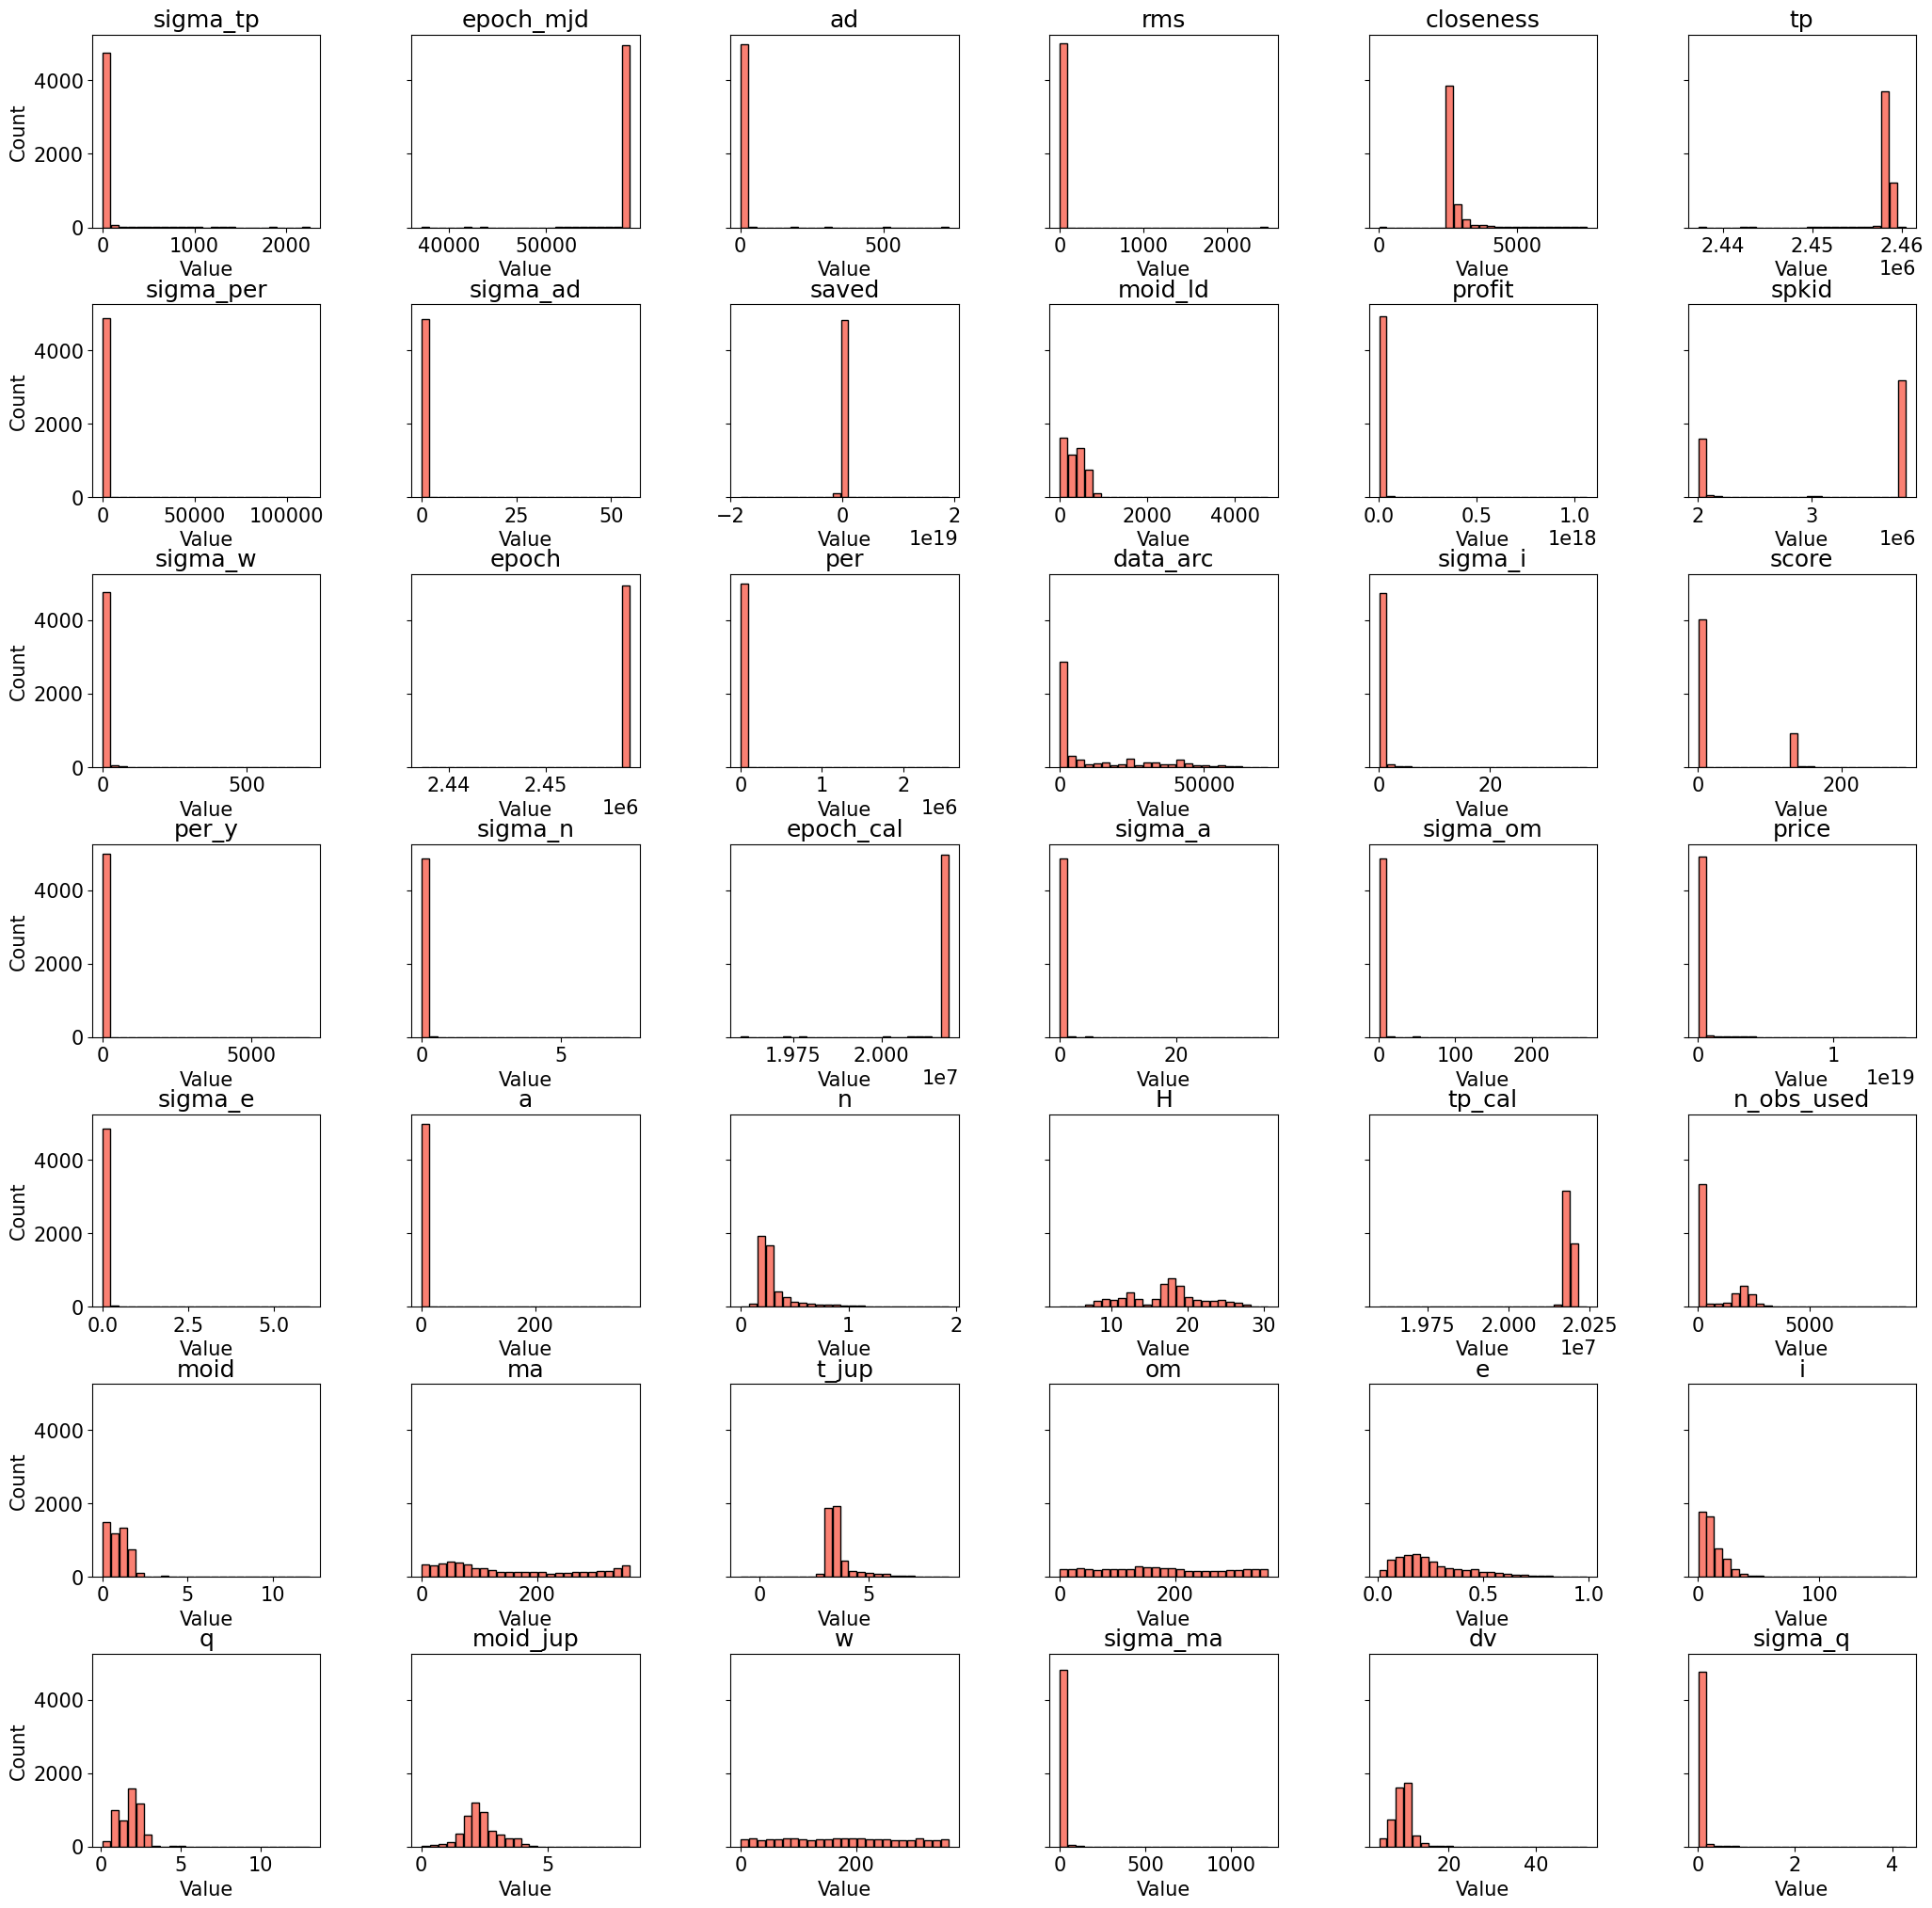

In [15]:
# Create a histogram of weight distribution counts for all samples
ax = df.hist(bins=25, grid=False, color='salmon', edgecolor='black', sharey=True, zorder=2, rwidth=0.9)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust values as needed
# Loop through the plots and add labels to x and y axes
for chart in ax.flatten():
    chart.set_xlabel("Value")
    chart.set_ylabel("Count")

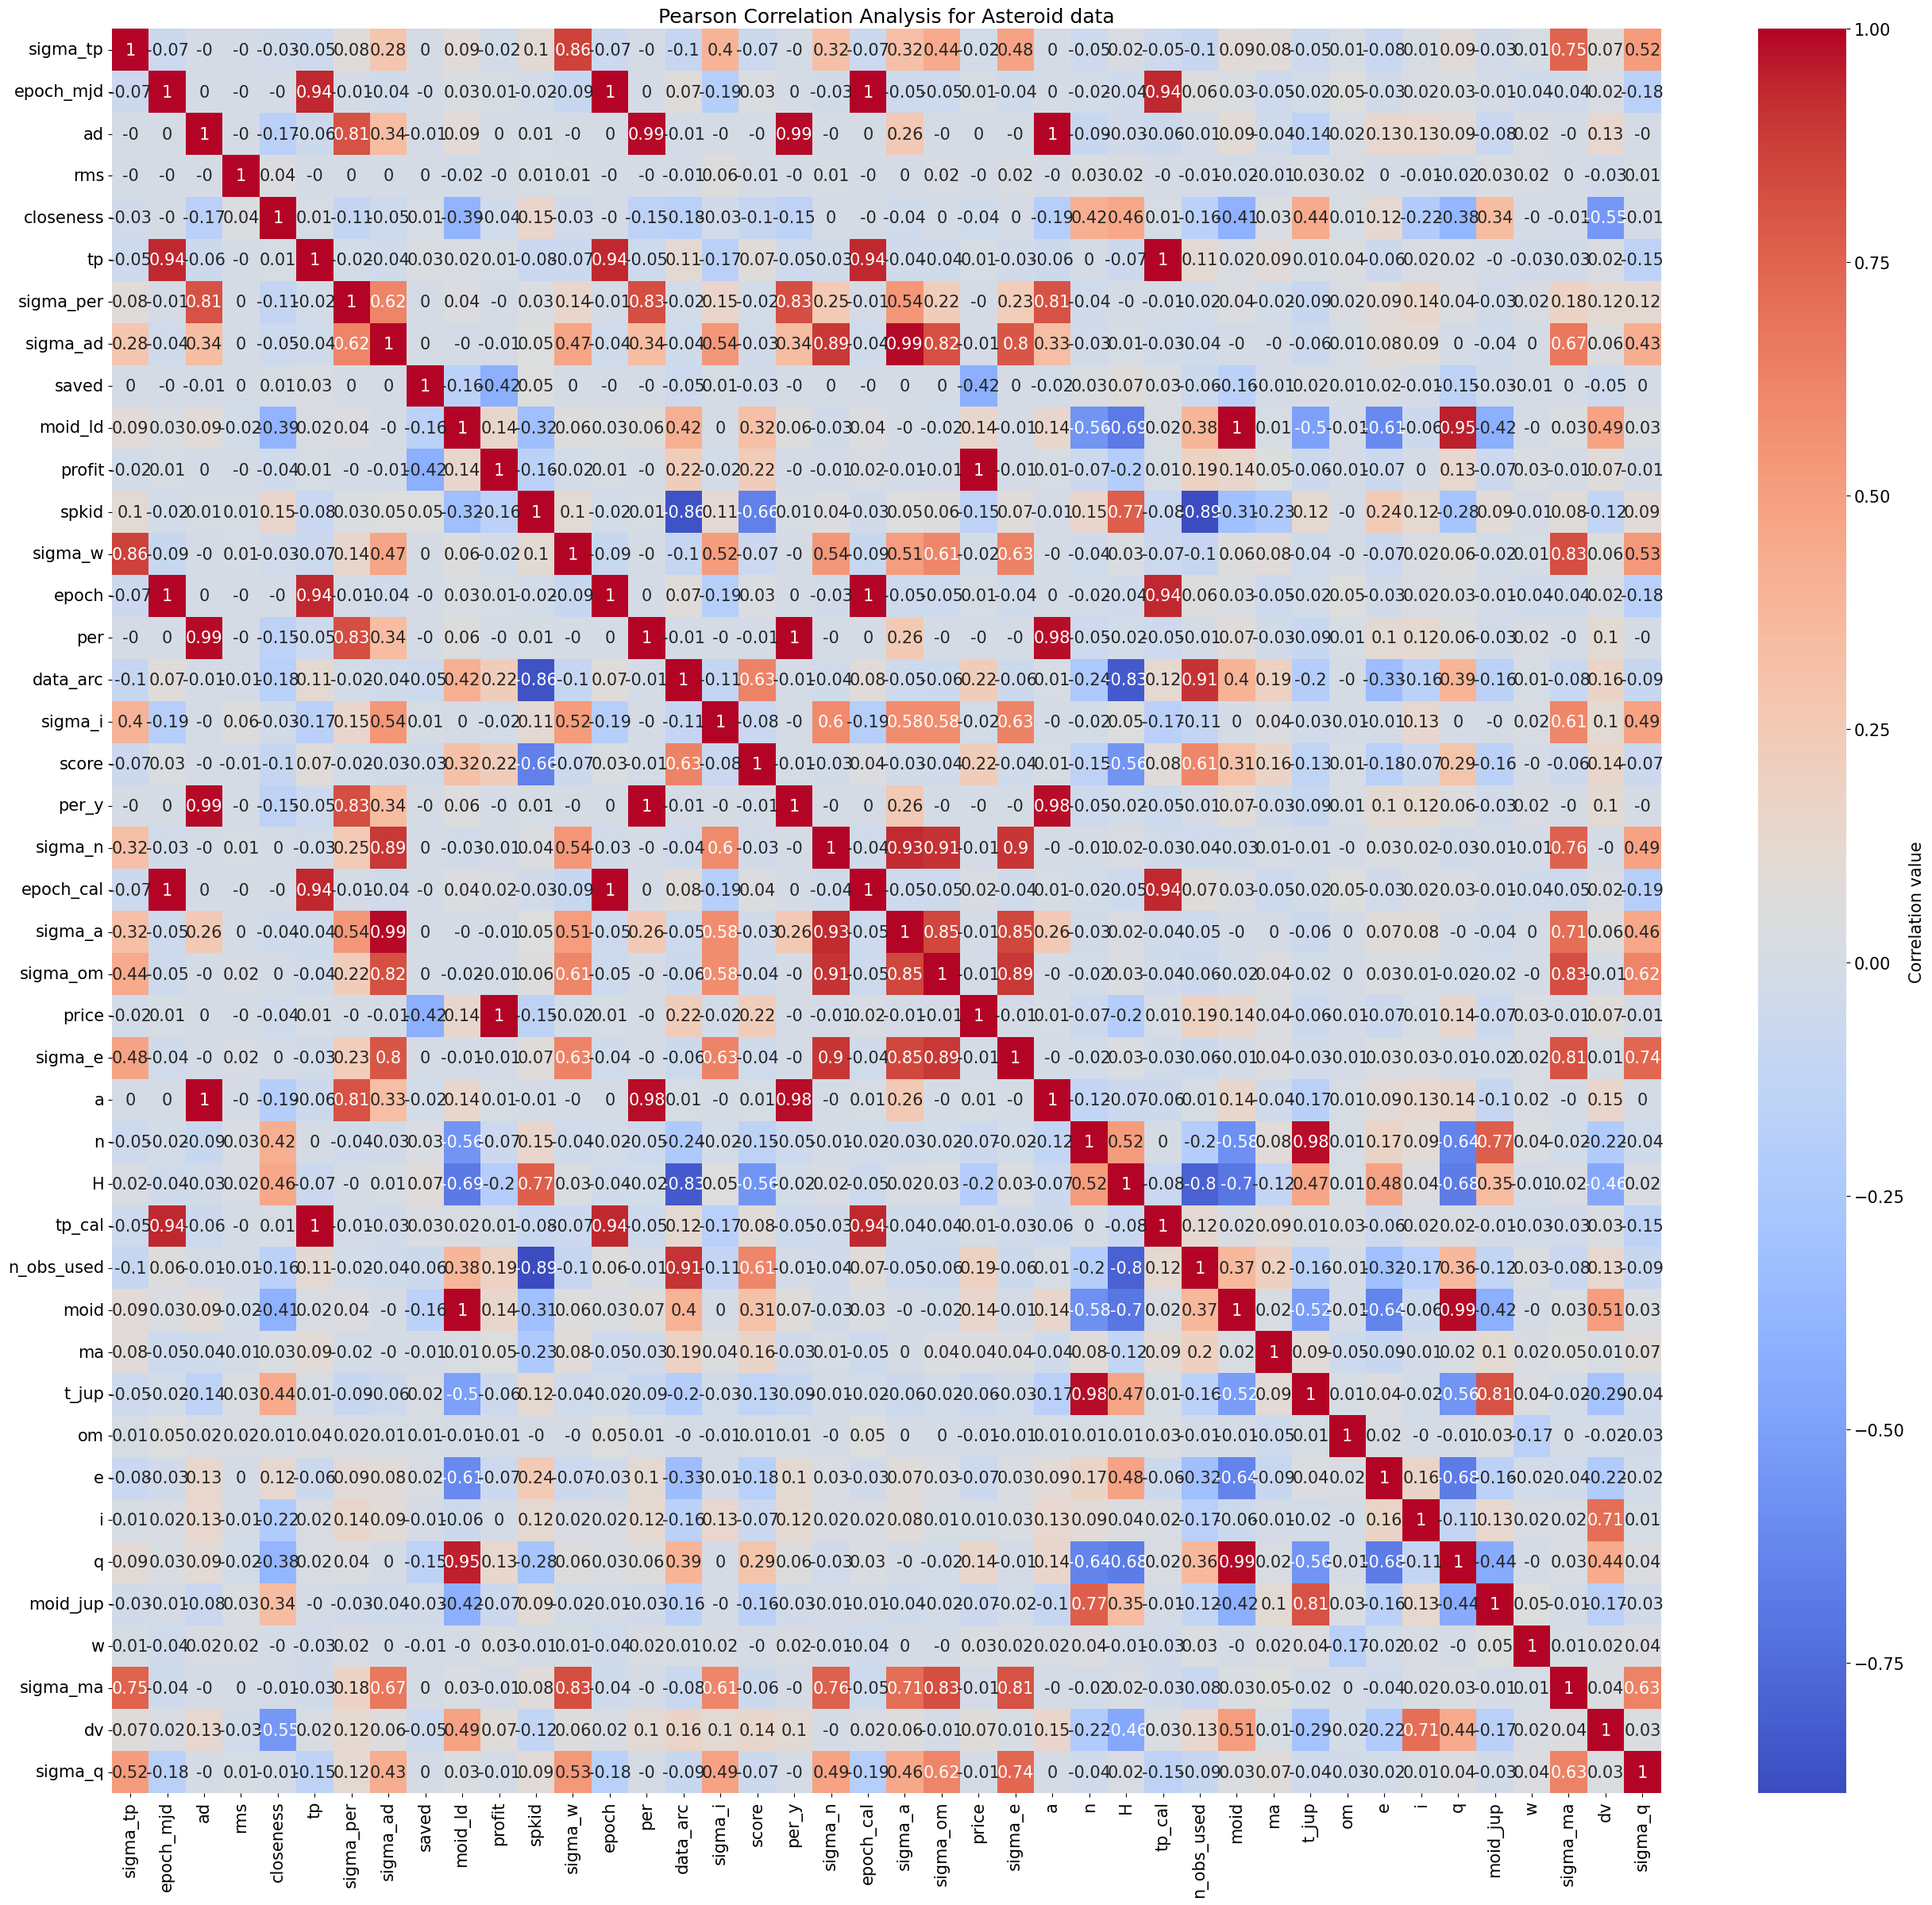

In [16]:
fig, ax = plt.subplots(sharex=True)

# Calculate the correlation matrix, dropping all NaN rows and columns
correlation_matrix = df_numeric.corr(method='pearson').dropna(axis=0, how='all').dropna(axis=1, how='all').round(2)

# Plot the results of the correlation as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation value'})
plt.title("Pearson Correlation Analysis for Asteroid data")
ax.set_position([0.55, 0.1, 0.35, 0.8])  # Adjust position manually

plt.tight_layout()
plt.show()

#### Seaborn Pairplots are extremely slow to process, so I focused on 2 different sets of columns with more than 2 high correlations in the Pearson Correlation Matrix above. I also sampled the larger data set and used KDE for the diagonal, as it will process much faster.


In [17]:
# Filter out some of the features with more high correlations to others as seen in the Pearson Correlation Matrix above
column_list_1 = ['sigma_tp', 'epoch_mjd', 'ad', 'tp', 'sigma_per', 'sigma_ad', 'tp_cal', 'sigma_ma', 'pha']
column_list_2 = ['per', 'per_y', 'sigma_w', 'sigma_a', 'sigma_om', 'sigma_e', 'a', 'pha']
filtered_df = df[column_list_1]
filtered_df_2 = df[column_list_2]

#### For the pairplots I plotted the data split out by potentially hazaradous asteroids (PHA), showing the 1D KDE on the diagonal, regression plot for the upper half and contour KDE plots for the lower half. NOTE: These plots take about 43 seconds to run using the High-RAM setting. I apologize that they take a bit, but they do provide insightful info

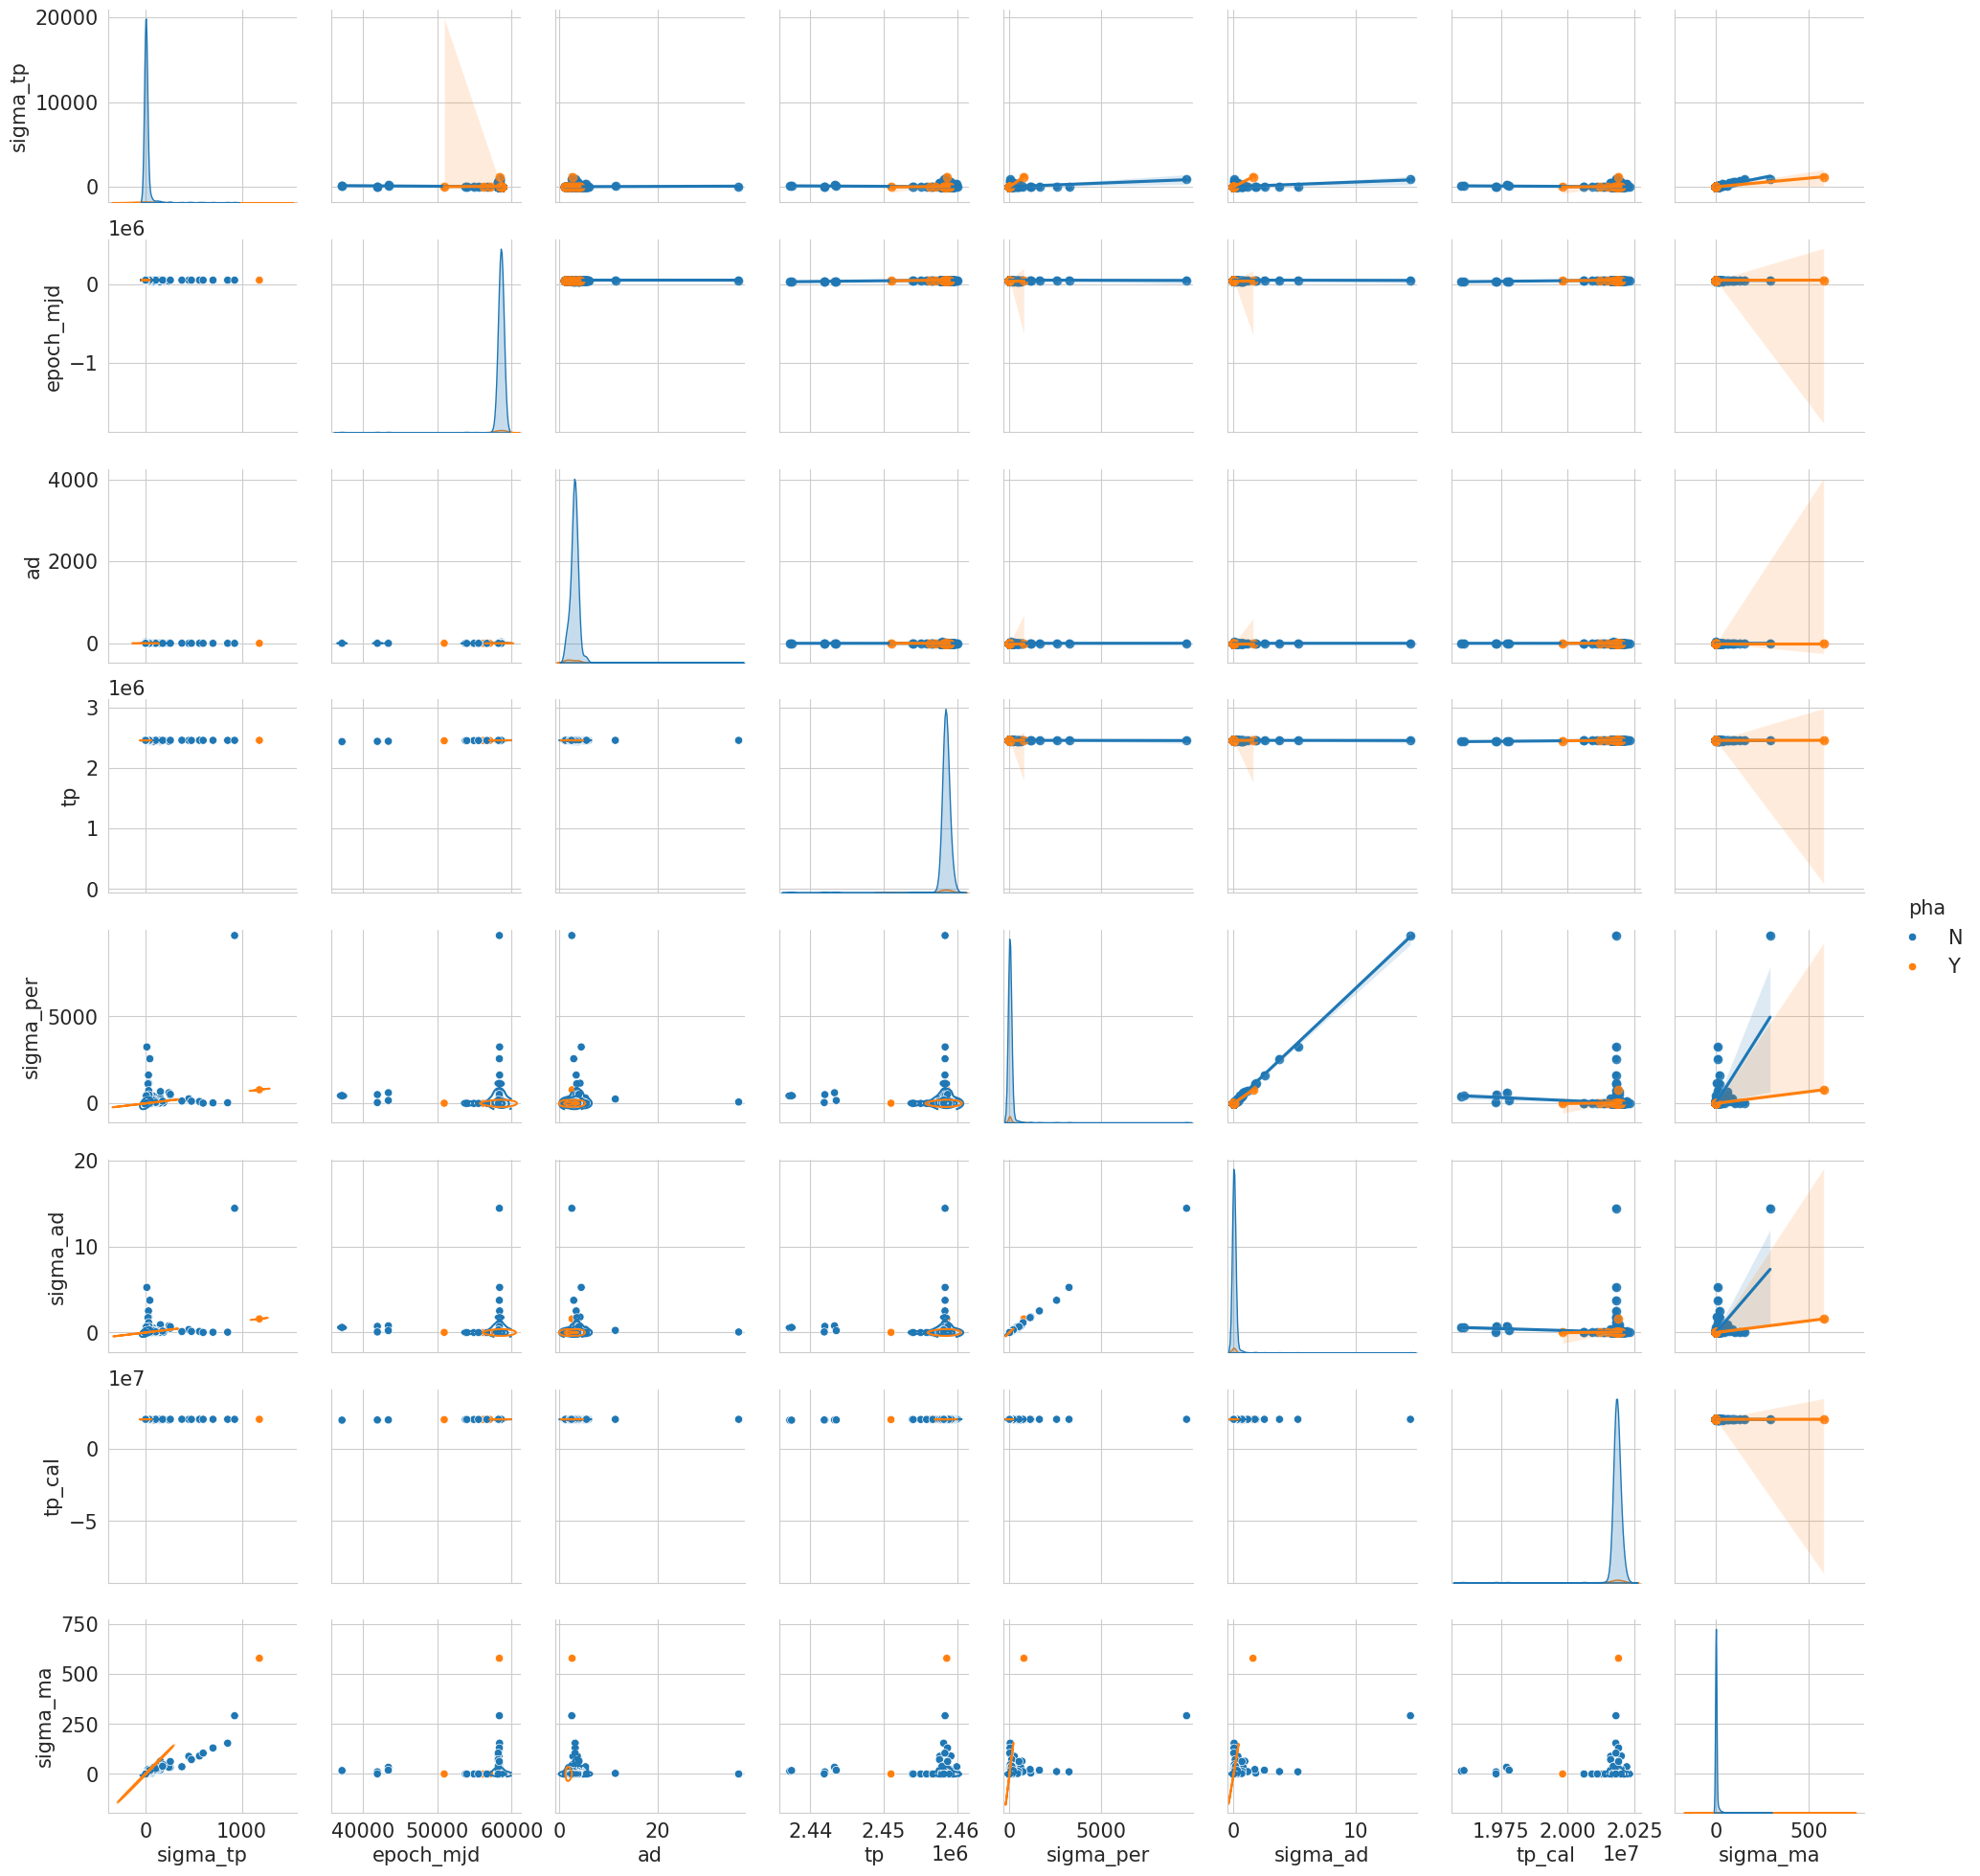

In [18]:
# These plots take about 43 seconds to process using the High-RAM setting in Colab
sns.set_style("whitegrid")
g = sns.pairplot(filtered_df.sample(n=1000), hue='pha', diag_kind="kde", dropna=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")  # Customize lower triangle with KDE plots
g.map_upper(sns.regplot)  # Add regression lines to plots above the diagonal
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


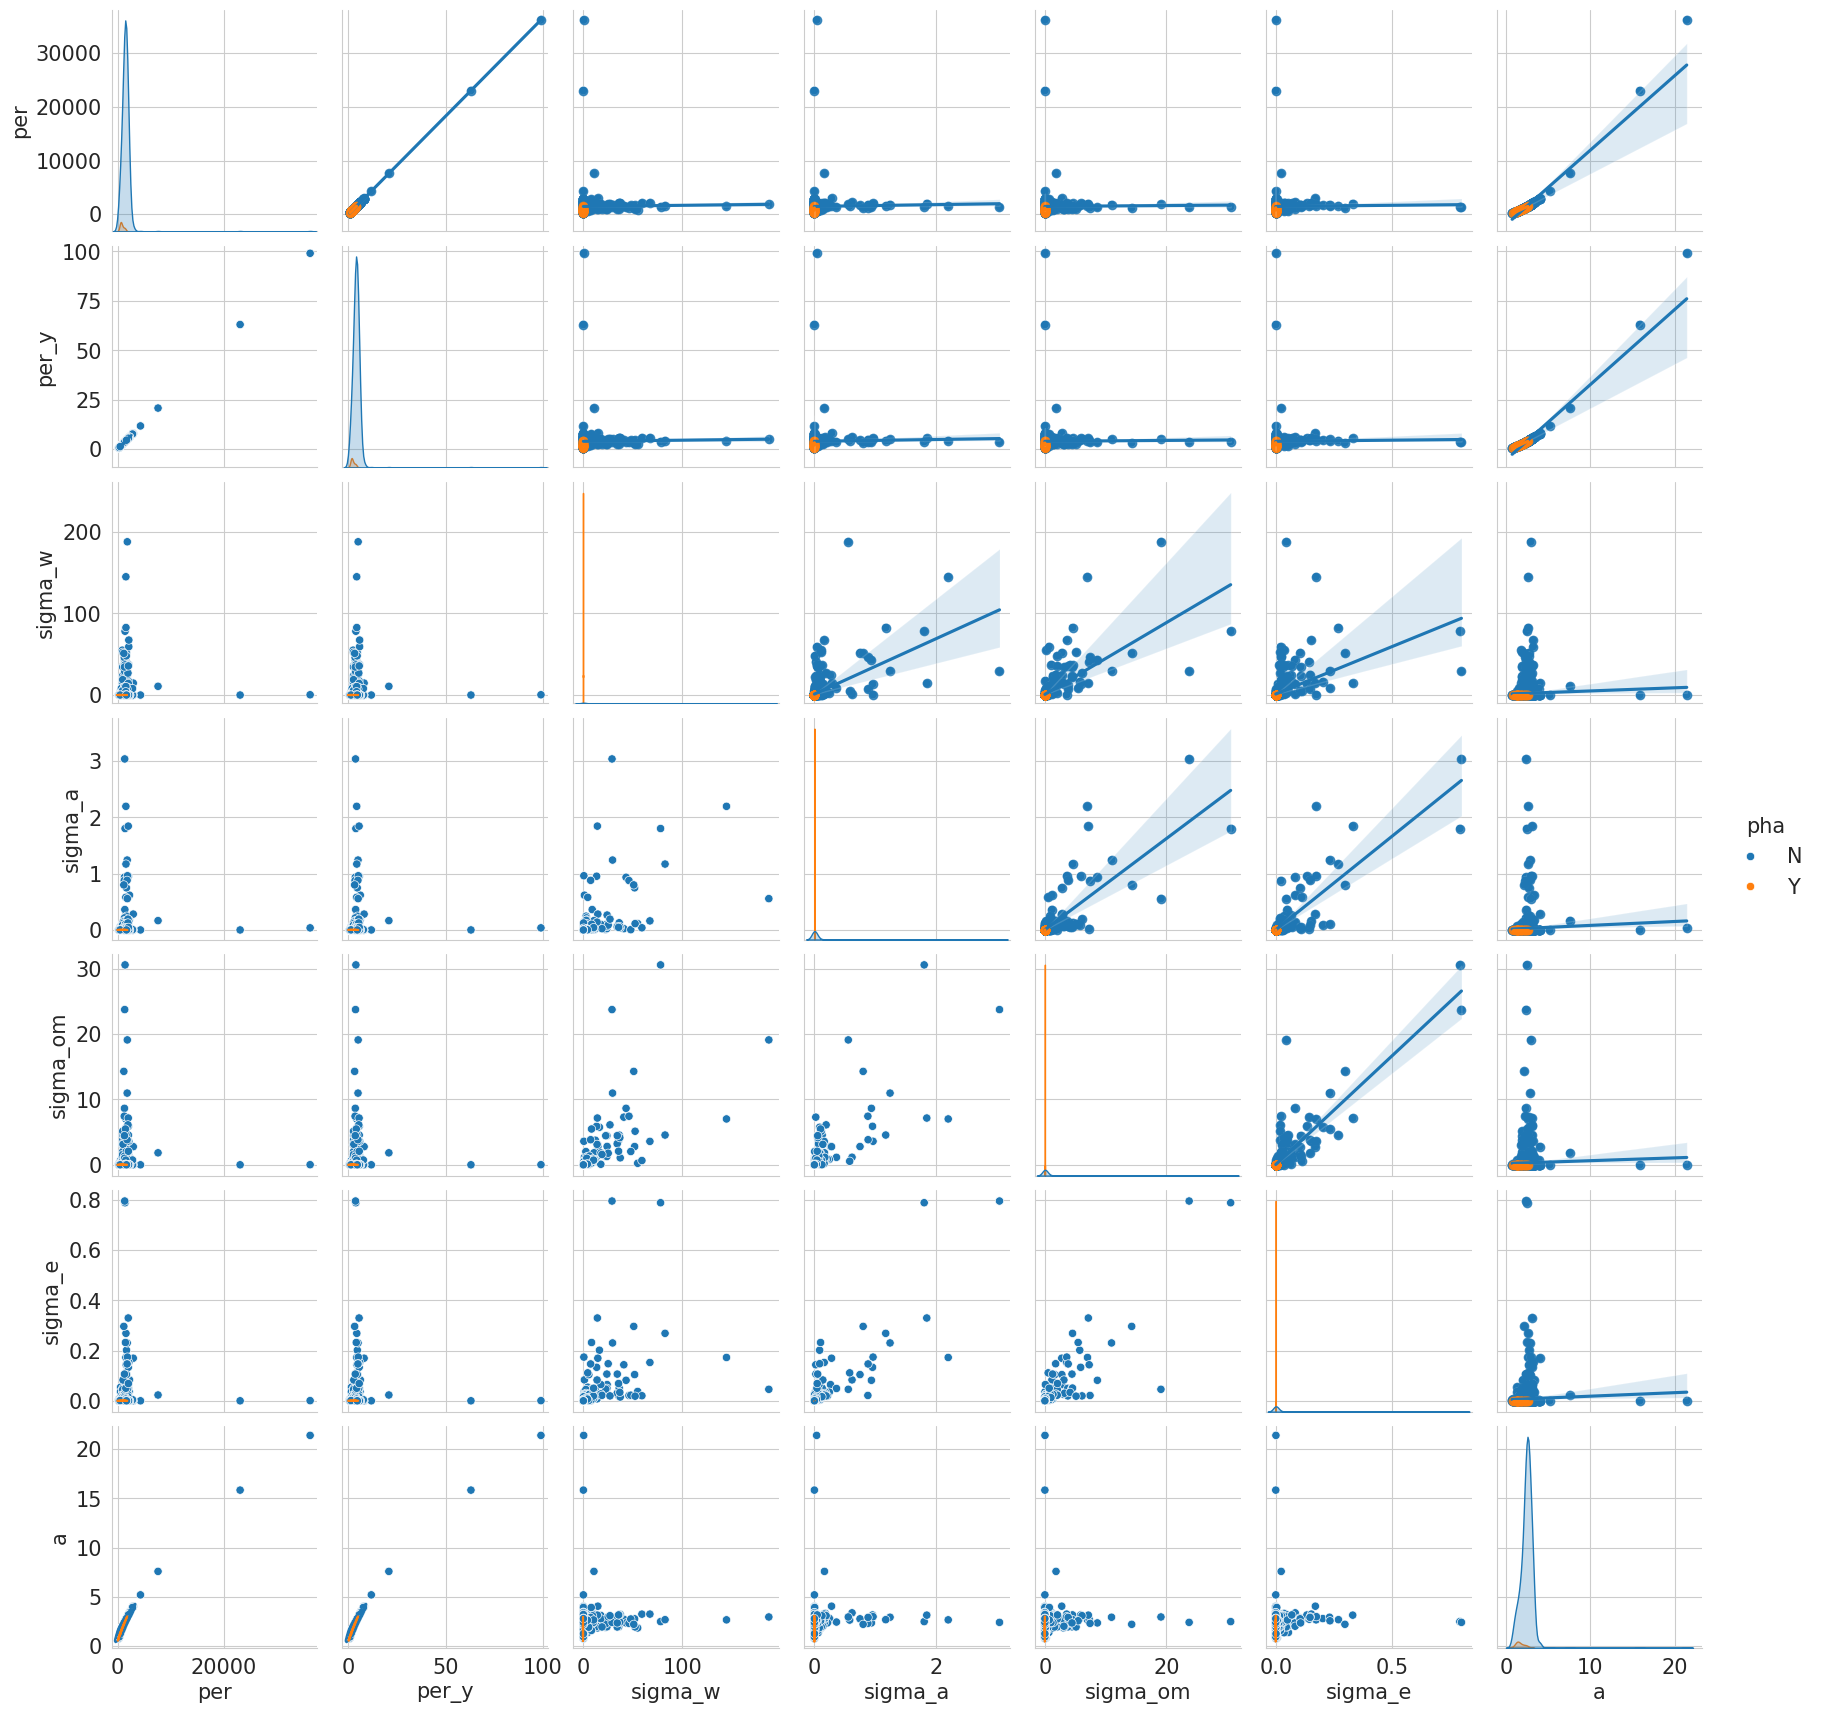

In [19]:
g = sns.pairplot(filtered_df_2.sample(n=1000), hue='pha', diag_kind="kde", dropna=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")  # Customize lower triangle with KDE plots
g.map_upper(sns.regplot)  # Add regression lines to plots above the diagonal
plt.show()

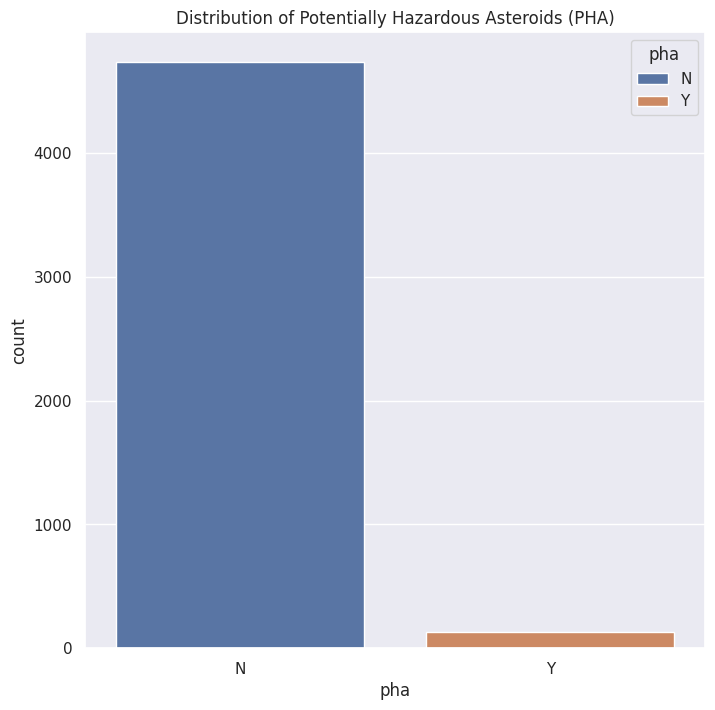

In [20]:
# Create a histogram to show potentially hazardous asteroids
sns.set_theme(rc={'figure.figsize':(8,8)})
sns.countplot(x='pha', data=df, hue='pha')
plt.title('Distribution of Potentially Hazardous Asteroids (PHA)')
plt.show()

#### Any missing data? There is some missing data, but as shown above, I removed the columns where there is a large amount of missing data. There will need to be a bit more data cleaning done to fill in missing entries for the features that remain in the data set
#### What do you hope to answer? My plan is to use Principle Component Analysis (PCA), Uniform Manifold Approximation and Projection (UMAP) and t-distributed Stochastic Neighbor Embedding (t-SNE) to perform dimensionality reduction on this data set to simplify it and determine which features are the most important. At this point there are still 42 numeric features.

#### For the columns with some null data, I am still trying to determine the best course of action. I could just drop those rows. However, I might just replace the missing values with imputation procedures, using an estimation for those values.

#### How big is this dataset? is it big data? The data is pretty complex based off the number of features, but as I have only pulled 5000 rows of data, I would not consider this data set to be "big data".